<a href="https://colab.research.google.com/github/MateosXS/Cat-and-Dog-Image-Classifier/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


For this challenge, you will complete the code to classify images of dogs and cats. You will use TensorFlow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):

cats_and_dogs

|__ train:

    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]

|__ validation:

    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
    |__ test: [1.jpg, 2.jpg ...]

You can tweak epochs and batch size if you like, but it is not required.

The following instructions correspond to specific cell numbers, indicated with a comment at the top of the cell (such as # 3).

In [37]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [38]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
#os.mkdir(PATH + '/test/test_data')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test', 'test_data')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [39]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one. For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay is in the order that our test expects. For test_data_gen it will also be helpful to observe the directory structure.

After you run the code, the output should look like this:

    Found 2000 images belonging to 2 classes.

    Found 1000 images belonging to 2 classes.

    Found 50 images belonging to 1 class.


In [40]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory = train_dir, batch_size = batch_size, target_size = (IMG_HEIGHT, IMG_WIDTH), class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory(directory = validation_dir, batch_size = batch_size, target_size = (IMG_HEIGHT, IMG_WIDTH), class_mode = 'binary')
test_data_gen = test_image_generator.flow_from_directory(directory = PATH, batch_size = batch_size, target_size = (IMG_HEIGHT, IMG_WIDTH), classes = ['test'], shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot five random training images.

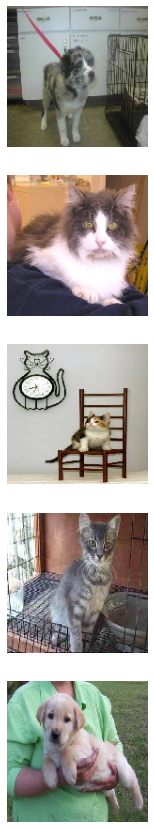

In [41]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Recreate the train_image_generator using ImageDataGenerator.

Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [42]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range = 0.5,
                                           width_shift_range = 0.2,
                                           height_shift_range = 0.1,
                                           zoom_range = -0.2,
                                           vertical_flip = True
                                           )


You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


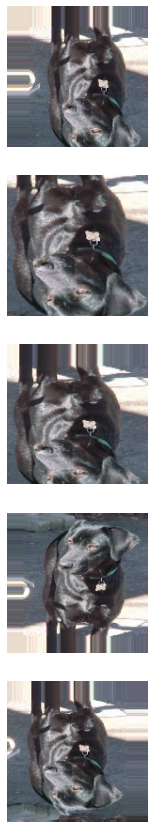

In [43]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In this cell, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [46]:
# 7
#Convolution layers
'''
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Dense layers
model.add(Flatten())
model.add(Dense (512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#Compile the Model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
'''
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))


#Dense layers
model.add(Flatten())
model.add(Dense (512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#Compile the Model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 82944)             0         
                                                                 
 dense_12 (Dense)            (None, 512)              

Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

In [47]:
# 8
history = model.fit(x = train_data_gen, epochs = epochs, steps_per_epoch = 16, validation_data = val_data_gen, validation_steps = 8)


Epoch 1/15
16/16 [==============================] - 124s 8s/step - loss: 3.8583 - accuracy: 0.4940 - val_loss: 0.9243 - val_accuracy: 0.4360
Epoch 2/15
16/16 [==============================] - 121s 8s/step - loss: 0.7559 - accuracy: 0.5435 - val_loss: 0.6833 - val_accuracy: 0.5900
Epoch 3/15
16/16 [==============================] - 122s 8s/step - loss: 0.7828 - accuracy: 0.5395 - val_loss: 0.7054 - val_accuracy: 0.5890
Epoch 4/15
16/16 [==============================] - 122s 8s/step - loss: 0.7314 - accuracy: 0.5650 - val_loss: 0.7932 - val_accuracy: 0.5080
Epoch 5/15
16/16 [==============================] - 121s 8s/step - loss: 0.6803 - accuracy: 0.5515 - val_loss: 0.6877 - val_accuracy: 0.5360
Epoch 6/15
16/16 [==============================] - 114s 7s/step - loss: 0.6461 - accuracy: 0.6165 - val_loss: 0.6383 - val_accuracy: 0.6130
Epoch 7/15
16/16 [==============================] - 121s 8s/step - loss: 0.6388 - accuracy: 0.6250 - val_loss: 0.6425 - val_accuracy: 0.6150
Epoch 8/15
16

#Model Evaluation
Run this cell to visualize the accuracy and loss of the model.

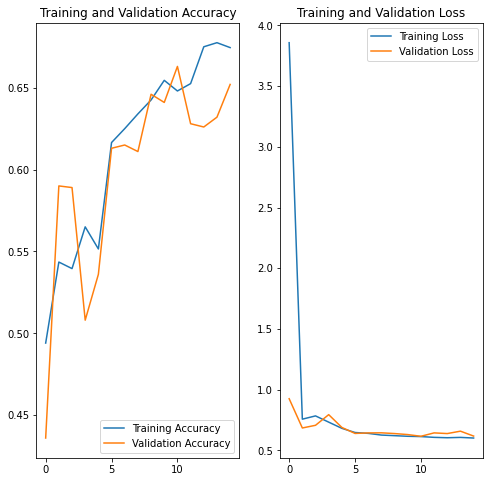

In [48]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

In [51]:
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/1 [==============================] - 1s 852ms/step


array([0.5673121 , 0.20112751, 0.32770205, 0.91714644, 0.36796355,
       0.45576692, 0.77726436, 0.25711212, 0.6091996 , 0.96291816,
       0.42951056, 0.524762  , 0.426603  , 0.11785364, 0.50184804,
       0.6286142 , 0.619017  , 0.8136881 , 0.424308  , 0.47188967,
       0.35467815, 0.83785415, 0.20901869, 0.77819365, 0.6895364 ,
       0.5282688 , 0.97755754, 0.17819516, 0.46103325, 0.44580877,
       0.64959997, 0.2894853 , 0.68861365, 0.9999937 , 0.3595432 ,
       0.6597242 , 0.99961287, 0.7005457 , 0.46453837, 0.5945535 ,
       0.37543705, 0.3347182 , 0.9391759 , 0.4375258 , 0.43084723,
       0.5013882 , 0.4707552 , 0.45739564, 0.4923121 , 0.36569208],
      dtype=float32)

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [52]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
